<a href="https://colab.research.google.com/github/AmanPriyanshu/py-stochastic-outlier-selection/blob/master/SOS_outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from math import exp

In [0]:
def dissimilarity_matrix(data):
	dissimilarity_matrix = np.empty([data.shape[0], data.shape[0]])
	for i in range(len(data)):
		for j in range(len(data)):
			d_ij = np.sum(np.square(data[i]-data[j]))
			dissimilarity_matrix[i][j] = d_ij

	return dissimilarity_matrix


In [0]:
def get_perplexity(D_row, variance):
    A_row = np.exp(-D_row * variance)
    sumA = sum(A_row)
    perplexity = np.log(sumA) + variance * np.sum(D_row * A_row) / sumA
    return perplexity, A_row

In [0]:
def affinity_matrix(dMatrix, perplexity, eps=1e-5):
  (n, _) = dMatrix.shape
  variance_matrix = np.ones(dMatrix.shape[0])
  affinity_matrix = np.zeros(dMatrix.shape)
  logU = np.log(perplexity)
  for i in range(dMatrix.shape[0]):
    variance_min = -np.inf
    variance_max =  np.inf
    d_i = dMatrix[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))]
    (c_perplexity, thisA) = get_perplexity(d_i, variance_matrix[i])
    perplexity_diff = c_perplexity - logU
    tries = 0
    while (np.isnan(perplexity_diff) or np.abs(perplexity_diff) > eps) and tries < 5000:
      if np.isnan(perplexity_diff):
        variance_matrix[i] = variance_matrix[i] / 10.0
      elif perplexity_diff > 0:
        variance_min = variance_matrix[i].copy()
        if variance_max == np.inf or variance_max == -np.inf:
          variance_matrix[i] = variance_matrix[i] * 2.0
        else:
          variance_matrix[i] = (variance_matrix[i] + variance_max) / 2.0
      else:
        variance_max = variance_matrix[i].copy()
        if variance_min == np.inf or variance_min == -np.inf:
          variance_matrix[i] = variance_matrix[i] / 2.0
        else:
          variance_matrix[i] = (variance_matrix[i] + variance_min) / 2.0
      (c_perplexity, thisA) = get_perplexity(d_i, variance_matrix[i])
      perplexity_diff = c_perplexity - logU
      tries += 1
    affinity_matrix[i, np.concatenate((np.r_[0:i], np.r_[i+1:n]))] = thisA
  return variance_matrix, affinity_matrix
    


In [0]:
def binding_matrix(aMatrix):
	binding_matrix = aMatrix / aMatrix.sum(axis=1)[:,np.newaxis]
	return binding_matrix

In [0]:
def outlier_probability(bMatrix):
	outlier_matrix = np.prod(1-bMatrix, 0)
	return outlier_matrix

In [0]:
 def sos(cleaned_data): 
  dMatrix = dissimilarity_matrix(cleaned_data)
  variance_matrix, affinity_matrix = affinity_matrix(dMatrix, 50)
  binding_matrix = binding_matrix(affinity_matrix)
  outlier_matrix = outlier_probability(binding_matrix)

In [0]:
def scatter_plot(X, Y):
  plt.scatter(X, Y, label= "stars", color= "green", marker= "*", s=10) 
  plt.xlabel('x - axis')
  plt.ylabel('y - axis')
  plt.title('My scatter plot!')
  plt.legend()
  plt.show() 

In [0]:
def data_generation():
  data = [[randint(0,100), randint(0,100)] if i%10 != 0 else [randint(500,1000), randint(500,1000)] for i in range(50)]
  print(data)
  data = np.array(data)
  return data


In [0]:
def feature_normalizer(data):
  normalized_data = [(i-min(i))/(max(i)-min(i)) for i in data.T]
  normalized_data = np.array(normalized_data)
  return normalized_data.T

[[800, 643], [3, 84], [80, 30], [12, 16], [42, 96], [19, 22], [42, 69], [64, 35], [89, 26], [64, 79], [797, 654], [88, 41], [5, 24], [33, 52], [40, 55], [60, 57], [62, 18], [74, 26], [70, 91], [66, 74], [782, 753], [63, 88], [26, 65], [78, 5], [9, 58], [17, 18], [21, 13], [58, 21], [31, 14], [58, 51], [794, 917], [89, 70], [71, 35], [52, 96], [85, 2], [55, 7], [37, 18], [95, 73], [97, 26], [15, 37], [562, 925], [98, 41], [17, 88], [79, 99], [98, 82], [92, 69], [67, 91], [94, 18], [64, 68], [49, 18]]


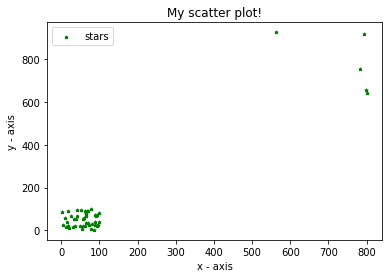

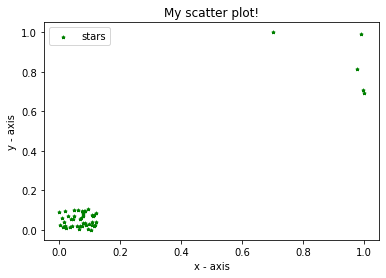

In [11]:
data = data_generation()
X = data.T[0]
Y = data.T[1]
scatter_plot(X, Y)
n_data = feature_normalizer(data)
X = n_data.T[0]
Y = n_data.T[1]
scatter_plot(X, Y)

In [12]:
d_matrix = dissimilarity_matrix(n_data)
print(d_matrix.tolist()[0])
print(d_matrix.tolist()[49])

[0.0, 1.3667923031144613, 1.2571895274509377, 1.4390002933612682, 1.2557410263244195, 1.4129204563662667, 1.2912686348457867, 1.2866979806582926, 1.2426894400954798, 1.226167114823229, 0.00015619918021931908, 1.223466591455564, 1.44474443987785, 1.3361229388931009, 1.3151436521073685, 1.2651590039146, 1.3159431358586453, 1.2766231532513073, 1.1966000841435789, 1.2281883320933051, 0.014713129862444338, 1.2166646289744032, 1.3352664101899967, 1.2984405711010552, 1.3867062232406353, 1.4236950726227655, 1.4212245772256078, 1.3208716920487067, 1.3953768227569703, 1.2781216506720194, 0.08818138887820498, 1.1812289193243823, 1.2705536879924142, 1.2320322942378148, 1.2871087347464671, 1.3485676616891078, 1.375018180450268, 1.1638288106693402, 1.2248811281855414, 1.4011778645985553, 0.18251960647587973, 1.201206201568141, 1.3267386361122113, 1.1657495588665316, 1.1452355749079381, 1.1758735444109851, 1.203509621004675, 1.243198574619746, 1.2408737394363127, 1.3464165705864277]
[1.34641657058642

In [13]:
variance_matrix, a_matrix = affinity_matrix(d_matrix, 40)
print(a_matrix.tolist()[0])
print(a_matrix.tolist()[49])

[0.0, 0.17217344687556163, 0.1982594419115428, 0.1568924589751231, 0.1986294262874936, 0.16224848117986573, 0.18975085212390602, 0.1908704600612591, 0.20199443076476478, 0.206336157335734, 0.999798970013188, 0.20705461972867675, 0.1557367490682804, 0.17910605974996072, 0.18400840205040303, 0.19623612520861547, 0.1838191460706138, 0.19336173140119806, 0.21434000770203893, 0.205800053044114, 0.9812403381644229, 0.20887535764127413, 0.17930362809975472, 0.18800726802235226, 0.16781637568444094, 0.1600138791473183, 0.16052351284589547, 0.18265673587771214, 0.16595391100081094, 0.19298913940997975, 0.8927026043567254, 0.21862291898717987, 0.19487823770487536, 0.20478432745206063, 0.19076957390743518, 0.17625997640050986, 0.17036011598954287, 0.22357452164070063, 0.20667797698667648, 0.1647193889130556, 0.7906275619402511, 0.21307300590926787, 0.18128258437106762, 0.2230224673892763, 0.2289896678823039, 0.2201351181740762, 0.2124422177006163, 0.2018621016525283, 0.20246705608282836, 0.176748

In [14]:
print(variance_matrix)

[  1.28713989  96.484375   169.0625     102.03125    133.921875
 122.65625    237.34375    265.78125    133.265625   179.765625
   1.27404785 151.78125     96.25       234.34375    286.65625
 312.0625     189.1875     182.75       132.671875   195.6875
   1.14654541 150.0625     177.3125     124.46875    118.953125
 113.40625    115.4453125  208.8125     139.125      342.4375
   0.94155884 133.25       226.15625    135.359375   109.78125
 154.796875   165.109375   115.5625     114.3125     128.21875
   1.34356689 120.671875   116.21875    106.875      101.671875
 126.609375   136.6875     113.234375   231.78125    193.03125   ]


In [15]:
b_matrix = binding_matrix(a_matrix)
print(b_matrix.tolist()[0])
print(b_matrix.tolist()[49])

[0.0, 0.014023154414278146, 0.016147802221927864, 0.012778551040068871, 0.016177936648164786, 0.013214787450423673, 0.01545479600868746, 0.015545985650725012, 0.016452008976075003, 0.016805633203469835, 0.08143146108856367, 0.016864150409577523, 0.012684420970793555, 0.014587800720641373, 0.01498708588521403, 0.01598300745787435, 0.014971671395485378, 0.015748894306628725, 0.017457529483832925, 0.016761968669826748, 0.07991990071235149, 0.01701244556983378, 0.014603892234906855, 0.015312784859267653, 0.01366828040080005, 0.013032783953801336, 0.013074292514961946, 0.014876995602419724, 0.013516586685400605, 0.015718547495774934, 0.07270869401813372, 0.01780636333355886, 0.015872410461138096, 0.01667924001986138, 0.015537768691960411, 0.014355993394892118, 0.01387546254029714, 0.01820966064721871, 0.016833473673844256, 0.013416037534654134, 0.06439490285215464, 0.017354334931446242, 0.01476507393786586, 0.01816469702388847, 0.01865071258234541, 0.017929528682733287, 0.017302958597794633

In [16]:
out = outlier_probability(b_matrix)
print(out.tolist())

[0.7303678594243006, 0.49516274519275383, 0.2962778493188821, 0.42852066485946505, 0.37146687795068917, 0.3746888408138403, 0.27858791579215836, 0.2555739079477141, 0.3385151016202063, 0.2913121199810301, 0.7286892262323016, 0.3110127745354794, 0.4482223019607382, 0.2820870466139472, 0.264562785033654, 0.24677784235405406, 0.2926336291048324, 0.2884014380875542, 0.34328168228796696, 0.2794504314210021, 0.7204340732384334, 0.32219658371521015, 0.3211967648512339, 0.370451457362615, 0.40061397527835124, 0.3959750781284154, 0.39305335912924466, 0.2820273915077507, 0.3495013190886845, 0.24353932091482894, 0.7309018475466733, 0.3346399101161835, 0.26530948896844025, 0.35714751543006834, 0.40662970144508104, 0.33258595798521584, 0.31783414645340313, 0.3694397798815631, 0.37712044165311387, 0.36699376072327294, 0.7541149818694866, 0.3598117108886214, 0.42867062618913115, 0.3998954665981221, 0.409283840357509, 0.3461752556298926, 0.3387319285475757, 0.38311301015148397, 0.2639380075639561, 0.2

In [17]:
outliers = []
for i in range(len(out.tolist())):
  if out[i] >= 0.7:
    outliers.append(data[i])
    print(i)

print(outliers)

0
10
20
30
40
[array([800, 643]), array([797, 654]), array([782, 753]), array([794, 917]), array([562, 925])]
